# Análisis Exploratorio de Datos (EDA) - COVID-19

## Presentaodo por:
- **Edwin Silva Salas**
- **Cristian Restrepo Zapata**
- **Carlos Preciado Cárdenas**

## Fase 1: Carga y Exploración Inicial de Datos

En esta primera fase del taller, realizaremos un análisis exploratorio de datos (EDA) sobre los casos confirmados de COVID-19 a nivel global. El objetivo es familiarizarnos con la estructura de los datos y obtener insights preliminares.

### Objetivos de la Fase 1:
1. **Cargar los datos**: Importar el archivo `time_series_covid19_confirmed_global.csv` que contiene información de casos confirmados por país y fecha.
2. **Inspeccionar la estructura**: Examinar las dimensiones, tipos de datos y valores faltantes.
3. **Análisis preliminar**: Identificar países con mayor número de casos, tendencias temporales y patrones relevantes.
4. **Visualización inicial**: Crear gráficos básicos para entender la distribución y evolución de los casos.

### Descripción del Dataset:
El dataset contiene información de casos confirmados de COVID-19 reportados por la Universidad Johns Hopkins. Cada fila representa un país/región y las columnas representan fechas con el número acumulado de casos confirmados.

---

## 1. Carga de Datos

In [1]:
import pandas as pd
# Leer el archivo CSV
df = pd.read_csv('../Data/time_series_covid19_confirmed_global.csv')

# Mostrar las primeras y ultimas filas
df.head(300)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


### 1.1. Dimensiones del Dataset

In [2]:
from IPython.display import display, Markdown, HTML

# Crear salida en Markdown
output_md = f"""

 **Número de filas:** {df.shape[0]}\n
 **Número de columnas:** {df.shape[1]}\n
 **Tamaño total:** {df.shape[0]} × {df.shape[1]}

"""

# Mostrar en formato Markdown
display(Markdown(output_md))



 **Número de filas:** 289

 **Número de columnas:** 1147

 **Tamaño total:** 289 × 1147



## 2. Transformación de datos (pivot)

Se evidencia que para facilitar el análisis del dataset es más conveniente transformar la estructura de los datos de formato ancho a formato largo. En el formato original, cada fecha está representada como una columna separada, lo que dificulta el análisis temporal y la visualización. Para solucionar esto, utilizamos el método **pivot** mediante la función `melt()` de pandas, que convierte las columnas de fechas en filas, creando una estructura más normalizada y manejable donde cada registro representa un país/región en una fecha específica con su respectivo número de casos confirmados.

In [3]:
from IPython.display import display, Markdown

# Identificar columnas de metadatos vs fechas
id_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols = [col for col in df.columns if col not in id_cols]

# Transformar de formato ancho a largo (MELT)
df_long = df.melt(
    id_vars=id_cols,           # Columnas que se mantienen
    value_vars=date_cols,       # Columnas que se convierten en filas
    var_name='Date',            # Nombre para la columna de fechas
    value_name='Cases'          # Nombre para la columna de valores
)

# Convertir la columna Date a tipo datetime
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/%d/%y')

# Ordenar por país y fecha
df_long = df_long.sort_values(['Country/Region', 'Date']).reset_index(drop=True)

# Configurar pandas para mostrar más filas
pd.set_option('display.max_rows', 10)
display(df_long.head(10))

#df_long.head(330327)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0
2,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0
3,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0
4,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0
5,NaN,Afghanistan,33.93911,67.709953,2020-01-27,0
6,NaN,Afghanistan,33.93911,67.709953,2020-01-28,0
7,NaN,Afghanistan,33.93911,67.709953,2020-01-29,0
8,NaN,Afghanistan,33.93911,67.709953,2020-01-30,0
9,NaN,Afghanistan,33.93911,67.709953,2020-01-31,0


In [4]:
# Crear salida en Markdown
output_md = f"""

 **Número de filas:** {df_long.shape[0]}\n
 **Número de columnas:** {df_long.shape[1]}\n
 **Tamaño total:** {df_long.shape[0]} × {df_long.shape[1]}

"""

# Mostrar en formato Markdown
display(Markdown(output_md))



 **Número de filas:** 330327

 **Número de columnas:** 6

 **Tamaño total:** 330327 × 6



## 3. Análisis de Calidad de Datos

En esta sección realizaremos un análisis exhaustivo de la calidad de los datos para identificar:
- Datos faltantes (valores nulos o NaN)
- Valores erróneos o inconsistentes
- Valores atípicos (outliers)
- Duplicados
- Tipos de datos incorrectos

### 3.1 Datos faltantes (valores nulos o NaN)

In [5]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de datos faltantes
null_counts = df_long.isnull().sum()
null_percentage = (df_long.isnull().sum() / len(df_long)) * 100

# Crear DataFrame con resultados
missing_data = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Faltantes': null_counts.values,
    'Porcentaje (%)': null_percentage.values
})

# Mostrar resumen en Markdown
display(Markdown(f"""**Total de filas en el dataset:** {len(df_long)}"""))

# Mostrar tabla de datos faltantes
display(missing_data)


**Total de filas en el dataset:** 330327

,Columna,Valores Faltantes,Porcentaje (%)
0,Province/State,226314,68.512111
1,Country/Region,0,0.000000
2,Lat,2286,0.692042
3,Long,2286,0.692042
4,Date,0,0.000000
5,Cases,0,0.000000


### 3.1.1. Interpretación de la Tabla de Datos Faltantes

La tabla anterior muestra un análisis detallado de los valores faltantes (nulos) en el dataset transformado de COVID-19. A continuación se explican los hallazgos para cada columna:

#### **Province/State** (Provincia/Estado)
- **Valores faltantes:** 226,314
- **Porcentaje:** 68.51%
- **Interpretación:** Esta es la columna con mayor cantidad de datos faltantes. Esto es **esperado y normal**, ya que muchos países reportan datos a nivel nacional sin desglose por provincias o estados. Por ejemplo, países pequeños como Andorra o Luxemburgo no tienen subdivisiones provinciales en el reporte.

#### **Lat** (Latitud) y **Long** (Longitud)
- **Valores faltantes:** 2,286 en cada una
- **Porcentaje:** 0.69%
- **Interpretación:** Un porcentaje muy bajo de registros sin coordenadas geográficas. Estos corresponden principalmente a categorías especiales como "Repatriated Travellers" (viajeros repatriados) o "Unknown" (desconocido), que no tienen una ubicación geográfica específica.

- **Interpretación:** **Datos completos**. Todos los registros tienen el número de casos confirmados, que es la variable principal de análisis.

#### Conclusión sobre Calidad de Datos:

El dataset presenta una **excelente calidad general**:
- Las columnas críticas (País, Fecha y Casos) están 100% completas
- Los valores faltantes en Province/State son estructurales (no todos los países reportan por provincia)
- Solo 0.69% de registros carecen de coordenadas geográficas, principalmente en categorías especiales que no requieren geolocalización

**Recomendación:** No es necesario eliminar registros por datos faltantes. Los valores nulos en Province/State y coordenadas pueden manejarse según el tipo de análisis a realizar.

### 3.2 Valores erróneos o inconsistentes

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Country/Region**

In [6]:
from IPython.display import display, Markdown

# 1. Análisis de la columna Country/Region
display(Markdown("""#### Análisis de Country/Region"""))

unique_countries = df_long['Country/Region'].nunique()
display(Markdown(f"Total de países/regiones únicos: {unique_countries}"))

# Verificar inconsistencias en nombres
countries_list = sorted(df_long['Country/Region'].unique())
problems_country = []
for country in countries_list:
    if country != country.strip():
        problems_country.append({'País': country, 'Problema': 'Espacios extra'})
    if any(char in country for char in ['_', '|', '@', '#']):
        problems_country.append({'País': country, 'Problema': 'Caracteres especiales'})

if len(problems_country) > 0:
    display(Markdown("Se encontraron inconsistencias:"))
    display(pd.DataFrame(problems_country))
else:
    display(Markdown("No se encontraron inconsistencias en nombres de países"))


#### Análisis de Country/Region

Total de países/regiones únicos: 201

No se encontraron inconsistencias en nombres de países

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Province/State**

In [7]:
# 2. Análisis de Province/State
display(Markdown("""#### Análisis de Province/State"""))

unique_provinces = df_long['Province/State'].nunique()
display(Markdown(f"Total de provincias/estados únicos: {unique_provinces}"))


display(Markdown(f"Muestra de los Country/Region con sus provincias/estados, solo estos tienen Province/State"))
provinces_by_country = df_long.groupby('Country/Region')['Province/State'].nunique().sort_values(ascending=False)
provinces_by_country = provinces_by_country[provinces_by_country > 0]
pd.set_option('display.max_rows', 100)   
display(provinces_by_country.head(10).to_frame())


#### Análisis de Province/State

Total de provincias/estados únicos: 91

Muestra de los Country/Region con sus provincias/estados, solo estos tienen Province/State

,Province/State
Country/Region,
China,34
Canada,16
United Kingdom,14
France,11
Australia,8
Netherlands,4
New Zealand,2
Denmark,2


No existen valores incongruentes o erroneos sobre **Province/State**

A continuación se realiza la verificación de valores erroneos o incosistentes sobre las columnas **Coordenaas LAT y LONG**

In [8]:
# 3. Verificar rangos válidos de coordenadas
display(Markdown("""
---
#### Análisis de Coordenadas Geográficas
"""))

invalid_coords = df_long[
    ((df_long['Lat'].notna()) & ((df_long['Lat'] < -90) | (df_long['Lat'] > 90))) |
    ((df_long['Long'].notna()) & ((df_long['Long'] < -180) | (df_long['Long'] > 180)))
]

if len(invalid_coords) > 0:
    display(Markdown(f"**{len(invalid_coords)} registros con coordenadas fuera de rango**"))
    display(invalid_coords[['Country/Region', 'Province/State', 'Lat', 'Long']].drop_duplicates().head(10))
else:
    display(Markdown("**Todas las coordenadas están en rangos válidos (-90/90, -180/180)**"))




---
#### Análisis de Coordenadas Geográficas


**Todas las coordenadas están en rangos válidos (-90/90, -180/180)**

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Cases**

In [9]:
# 4. Verificar valores negativos en Cases
display(Markdown("""
---
#### Verificación de Valores Negativos
"""))

negative_cases = df_long[df_long['Cases'] < 0]
if len(negative_cases) > 0:
    display(Markdown(f"**ALERTA: {len(negative_cases):,} registros con casos negativos**"))
    display(negative_cases[['Country/Region', 'Province/State', 'Date', 'Cases']].head(10))
else:
    display(Markdown("**No hay valores negativos en Cases**"))




---
#### Verificación de Valores Negativos


**No hay valores negativos en Cases**

### 3.3 Valores atípicos (outliers)


Antes de realizar el análisis de valores átipicos se explora el tipo de variables de cada columna del dataset:

In [14]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Identificar tipos de columnas
display(Markdown("""
---
### Identificación de Tipos de Columnas
"""))

# Separar columnas por tipo
columnas_numericas = df_long.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_long.select_dtypes(include=['object']).columns.tolist()
columnas_datetime = df_long.select_dtypes(include=['datetime64']).columns.tolist()

# Crear DataFrame resumen
tipos_columnas = pd.DataFrame({
    'Columna': df_long.columns,
    'Tipo de Dato': df_long.dtypes.astype(str),
    'Clasificación': ['Numérica' if col in columnas_numericas else 
                      'Categórica' if col in columnas_categoricas else 
                      'Fecha' for col in df_long.columns]
})

display(Markdown(f"""
**Resumen de tipos de columnas:**
- **Columnas Numéricas:** {len(columnas_numericas)} → {', '.join([f'`{col}`' for col in columnas_numericas])}
- **Columnas Categóricas:** {len(columnas_categoricas)} → {', '.join([f'`{col}`' for col in columnas_categoricas])}
- **Columnas de Fecha:** {len(columnas_datetime)} → {', '.join([f'`{col}`' for col in columnas_datetime])}
"""))

display(tipos_columnas)




---
### Identificación de Tipos de Columnas



**Resumen de tipos de columnas:**
- **Columnas Numéricas:** 3 → `Lat`, `Long`, `Cases`
- **Columnas Categóricas:** 2 → `Province/State`, `Country/Region`
- **Columnas de Fecha:** 1 → `Date`


,Columna,Tipo de Dato,Clasificación
Province/State,Province/State,object,Categórica
Country/Region,Country/Region,object,Categórica
Lat,Lat,float64,Numérica
Long,Long,float64,Numérica
Date,Date,datetime64[ns],Fecha
Cases,Cases,int64,Numérica


Teniendo en cuenta la identificacion de variables numericas, se procede a realizar sobre estas variables, el análisis de valores átipicos.

In [18]:
# 2. Análisis de Outliers en columnas numéricas
display(Markdown("""
---
### Análisis de Outliers - Columna 'Cases'
"""))

# Estadísticas descriptivas
display(Markdown("#### Estadísticas Descriptivas"))
stats = df_long['Cases'].describe()
display(stats.to_frame().T)

# Método IQR (Rango Intercuartílico)
Q1 = df_long['Cases'].quantile(0.25)
Q3 = df_long['Cases'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

display(Markdown(f"""
#### Método IQR (Interquartile Range)

- **Q1 (Cuartil 25%):** {Q1:,.0f}
- **Q3 (Cuartil 75%):** {Q3:,.0f}
- **IQR (Rango Intercuartílico):** {IQR:,.0f}
- **Límite Inferior:** {limite_inferior:,.0f}
- **Límite Superior:** {limite_superior:,.0f}
"""))

# Identificar outliers
outliers = df_long[(df_long['Cases'] < limite_inferior) | (df_long['Cases'] > limite_superior)]
outliers_superiores = df_long[df_long['Cases'] > limite_superior]
outliers_inferiores = df_long[df_long['Cases'] < limite_inferior]

display(Markdown(f"""
**Resultados:**
- **Total de outliers detectados:** {len(outliers):,} ({(len(outliers)/len(df_long)*100):.2f}% del dataset)
- **Outliers superiores:** {len(outliers_superiores):,}
- **Outliers inferiores:** {len(outliers_inferiores):,}
"""))

# Top 10 outliers superiores por país (última fecha)
if len(outliers_superiores) > 0:
    display(Markdown("#### Top 10 de Países con Valores Más Altos (Outliers Superiores)"))
    latest_date = df_long['Date'].max()
    top_outliers = df_long[df_long['Date'] == latest_date].nlargest(10, 'Cases')
    display(top_outliers[['Country/Region', 'Province/State', 'Date', 'Cases']])



---
### Análisis de Outliers - Columna 'Cases'


#### Estadísticas Descriptivas

,count,mean,std,min,25%,50%,75%,max
Cases,330327.0,959383.569369,4.866034e+06,0.0,680.0,14429.0,228517.0,103802702.0



#### Método IQR (Interquartile Range)

- **Q1 (Cuartil 25%):** 680
- **Q3 (Cuartil 75%):** 228,517
- **IQR (Rango Intercuartílico):** 227,837
- **Límite Inferior:** -341,076
- **Límite Superior:** 570,272



**Resultados:**
- **Total de outliers detectados:** 56,028 (16.96% del dataset)
- **Outliers superiores:** 56,028
- **Outliers inferiores:** 0


#### Top 10 de Países con Valores Más Altos (Outliers Superiores)

,Country/Region,Province/State,Date,Cases
298322,US,NaN,2023-03-09,103802702
170306,India,NaN,2023-03-09,44690738
150875,France,NaN,2023-03-09,38618509
155447,Germany,NaN,2023-03-09,38249060
36575,Brazil,NaN,2023-03-09,37076053
179450,Japan,NaN,2023-03-09,33320438
186308,"Korea, South",NaN,2023-03-09,30615522
177164,Italy,NaN,2023-03-09,25603510
318896,United Kingdom,NaN,2023-03-09,24425309
253745,Russia,NaN,2023-03-09,22075858


In [19]:

# 3. Análisis de Outliers en Lat y Long
display(Markdown("""
---
### Análisis de Outliers - Coordenadas (Lat/Long)
"""))

# Lat
display(Markdown("#### Latitud"))
lat_stats = df_long['Lat'].describe()
display(lat_stats.to_frame().T)

Q1_lat = df_long['Lat'].quantile(0.25)
Q3_lat = df_long['Lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
limite_inf_lat = Q1_lat - 1.5 * IQR_lat
limite_sup_lat = Q3_lat + 1.5 * IQR_lat

outliers_lat = df_long[(df_long['Lat'] < limite_inf_lat) | (df_long['Lat'] > limite_sup_lat)]
display(Markdown(f"**Outliers en Latitud:** {len(outliers_lat):,}"))

# Long
display(Markdown("#### Longitud"))
long_stats = df_long['Long'].describe()
display(long_stats.to_frame().T)

Q1_long = df_long['Long'].quantile(0.25)
Q3_long = df_long['Long'].quantile(0.75)
IQR_long = Q3_long - Q1_long
limite_inf_long = Q1_long - 1.5 * IQR_long
limite_sup_long = Q3_long + 1.5 * IQR_long

outliers_long = df_long[(df_long['Long'] < limite_inf_long) | (df_long['Long'] > limite_sup_long)]
display(Markdown(f"**Outliers en Longitud:** {len(outliers_long):,}"))



---
### Análisis de Outliers - Coordenadas (Lat/Long)


#### Latitud

,count,mean,std,min,25%,50%,75%,max
Lat,328041.0,19.718719,25.911388,-71.9499,3.9339,21.512583,40.463667,71.7069


**Outliers en Latitud:** 2,286

#### Longitud

,count,mean,std,min,25%,50%,75%,max
Long,328041.0,22.182084,77.735268,-178.1165,-42.6043,20.9394,90.3563,178.065


**Outliers en Longitud:** 0


---
### Visualizaciones de Outliers


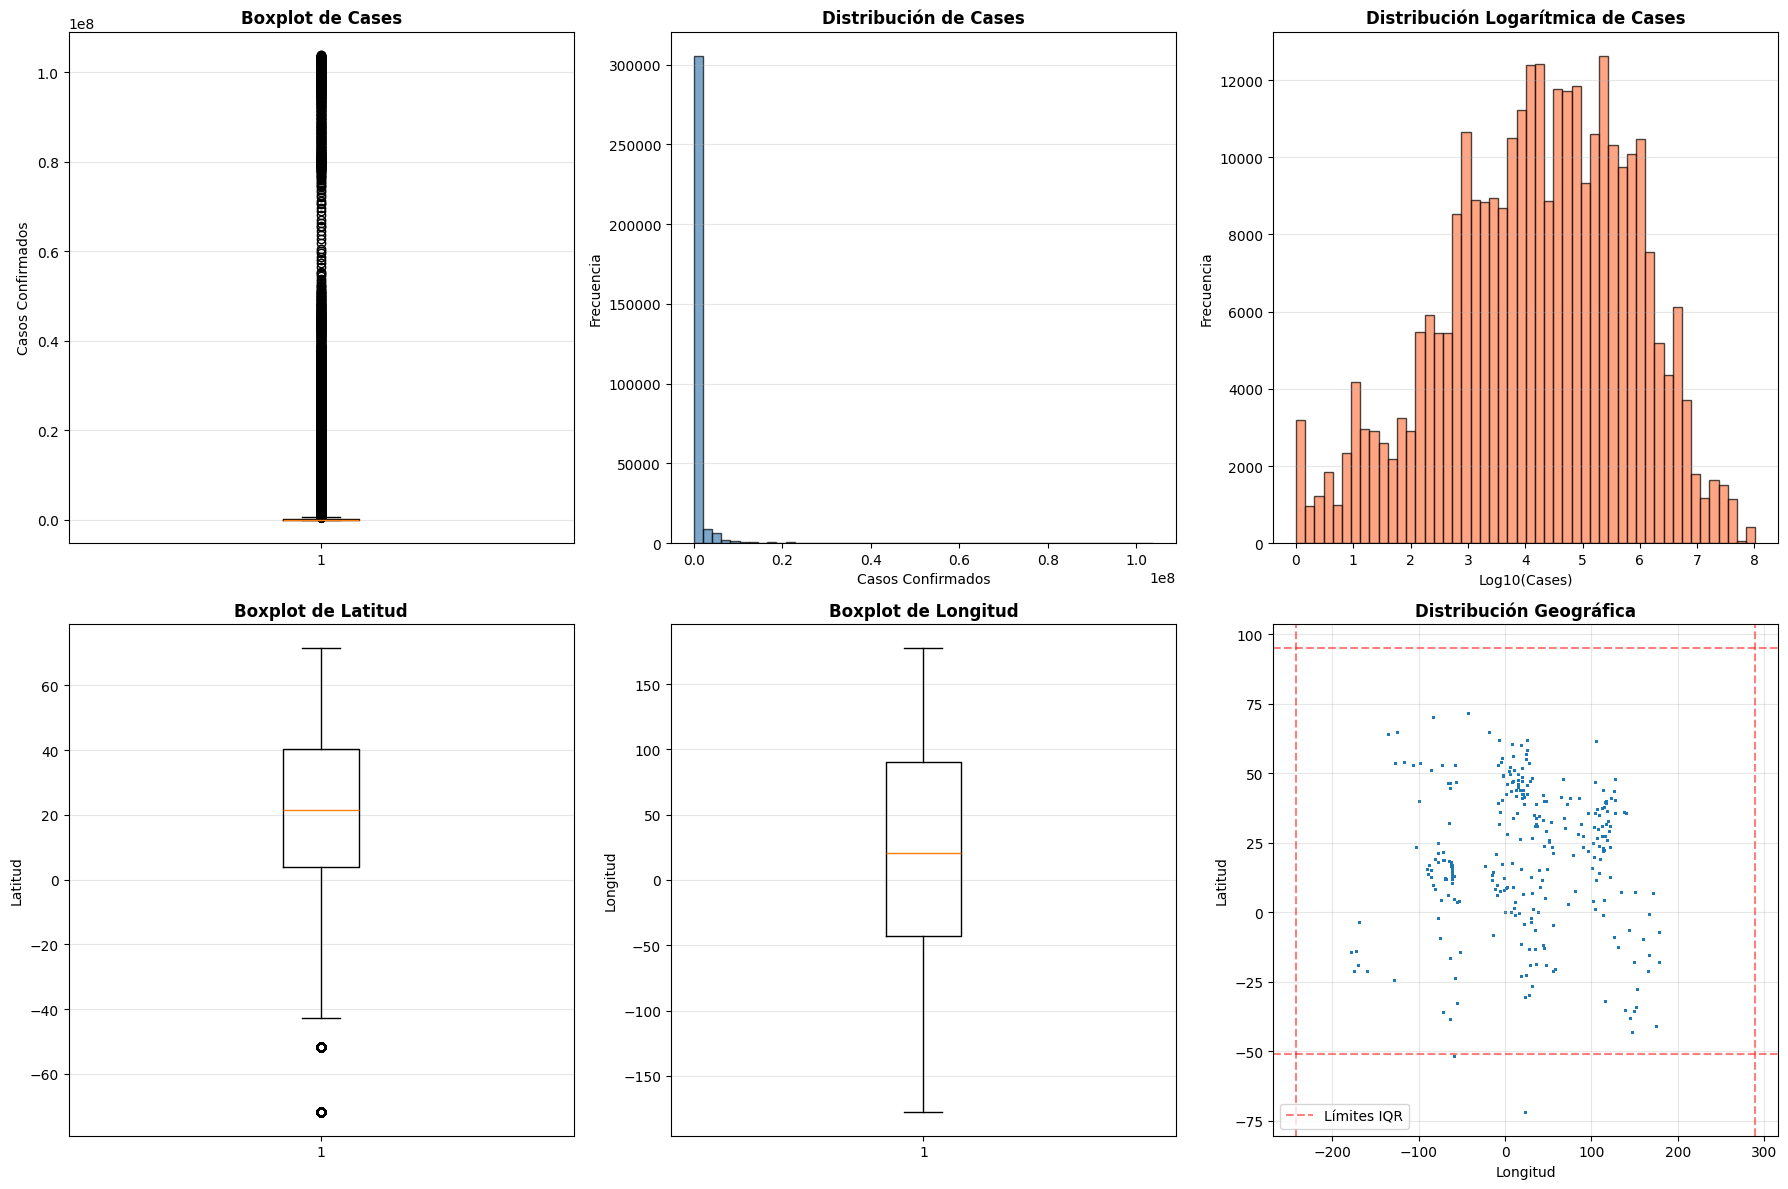

In [22]:
# 4. Visualizaciones
display(Markdown("""
---
### Visualizaciones de Outliers
"""))

# Crear figura con múltiples gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Boxplot de Cases
axes[0, 0].boxplot(df_long['Cases'].dropna(), vert=True)
axes[0, 0].set_ylabel('Casos Confirmados')
axes[0, 0].set_title('Boxplot de Cases', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: Histograma de Cases
axes[0, 1].hist(df_long['Cases'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].set_xlabel('Casos Confirmados')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Cases', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Gráfico 3: Histograma con escala logarítmica
valores_positivos = df_long[df_long['Cases'] > 0]['Cases']
axes[0, 2].hist(np.log10(valores_positivos), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 2].set_xlabel('Log10(Cases)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Distribución Logarítmica de Cases', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# Gráfico 4: Boxplot de Lat
axes[1, 0].boxplot(df_long['Lat'].dropna(), vert=True)
axes[1, 0].set_ylabel('Latitud')
axes[1, 0].set_title('Boxplot de Latitud', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Gráfico 5: Boxplot de Long
axes[1, 1].boxplot(df_long['Long'].dropna(), vert=True)
axes[1, 1].set_ylabel('Longitud')
axes[1, 1].set_title('Boxplot de Longitud', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# Gráfico 6: Scatter plot Lat vs Long (muestra outliers geográficos)
axes[1, 2].scatter(df_long['Long'], df_long['Lat'], alpha=0.3, s=1)
axes[1, 2].set_xlabel('Longitud')
axes[1, 2].set_ylabel('Latitud')
axes[1, 2].set_title('Distribución Geográfica', fontweight='bold')
axes[1, 2].grid(alpha=0.3)
axes[1, 2].axhline(y=limite_inf_lat, color='r', linestyle='--', alpha=0.5, label='Límites IQR')
axes[1, 2].axhline(y=limite_sup_lat, color='r', linestyle='--', alpha=0.5)
axes[1, 2].axvline(x=limite_inf_long, color='r', linestyle='--', alpha=0.5)
axes[1, 2].axvline(x=limite_sup_long, color='r', linestyle='--', alpha=0.5)
axes[1, 2].legend()

plt.tight_layout()
plt.show()



In [32]:
# 5. Resumen de Outliers
display(Markdown("""
---
### Resumen de Outliers Detectados
"""))

resumen_outliers = pd.DataFrame({
    'Columna': ['Cases', 'Lat', 'Long'],
    'Total Outliers': [len(outliers), len(outliers_lat), len(outliers_long)],
    'Porcentaje': [
        f"{(len(outliers)/len(df_long)*100):.2f}%",
        f"{(len(outliers_lat)/len(df_long.dropna(subset=['Lat']))*100):.2f}%",
        f"{(len(outliers_long)/len(df_long.dropna(subset=['Long']))*100):.2f}%"
    ],
    'Límite Inferior': [f"{limite_inferior:,.0f}", f"{limite_inf_lat:.2f}", f"{limite_inf_long:.2f}"],
    'Límite Superior': [f"{limite_superior:,.0f}", f"{limite_sup_lat:.2f}", f"{limite_sup_long:.2f}"]
})

display(resumen_outliers)


---
### Resumen de Outliers Detectados


,Columna,Total Outliers,Porcentaje,Límite Inferior,Límite Superior
0,Cases,56028,16.96%,"-341,076","570,272"
1,Lat,2286,0.70%,-50.86,95.26
2,Long,0,0.00%,-242.05,289.80



### Conclusiones sobre Outliers

1. **Cases**: Los outliers superiores corresponden principalmente a países con alta población (US, India, Brasil, etc.). **Esto es esperado y no representa errores**.

2. **Lat/Long**: Los outliers geográficos pueden representar ubicaciones extremas (polos, islas remotas) o errores de coordenadas.

3. **Recomendación**: 
   - No eliminar outliers en Cases (son datos reales de países grandes)
   - Revisar outliers en coordenadas para verificar su validez
   - Los valores atípicos reflejan la naturaleza heterogénea de los datos (países pequeños vs grandes)

### 3.4 Duplicados


In [28]:
from IPython.display import display, Markdown
import pandas as pd

# 1. Duplicados exactos (todas las columnas)
display(Markdown("""
---
### Duplicados Exactos (Todas las Columnas)
"""))

duplicados_totales = df_long.duplicated().sum()
total_registros = len(df_long)
porcentaje_duplicados = (duplicados_totales / total_registros) * 100

display(Markdown(f"""
- **Total de registros:** {total_registros:,}
- **Registros duplicados:** {duplicados_totales:,}
- **Porcentaje:** {porcentaje_duplicados:.2f}%
"""))

if duplicados_totales > 0:
    display(Markdown("**Se encontraron registros duplicados exactos**"))
    
    # Mostrar algunos ejemplos de duplicados
    df_duplicados = df_long[df_long.duplicated(keep=False)].sort_values(['Country/Region', 'Date'])
    display(Markdown(f"\n**Muestra de registros duplicados (primeros 20):**"))
    display(df_duplicados.head(20))
else:
    display(Markdown("**No hay registros completamente duplicados**"))



---
### Duplicados Exactos (Todas las Columnas)



- **Total de registros:** 330,327
- **Registros duplicados:** 0
- **Porcentaje:** 0.00%


**No hay registros completamente duplicados**

### Conclusiones sobre Duplicados

1. **Integridad de Datos**: 
   - La clave primaria (País, Provincia, Fecha) es única - no hay duplicados problemáticos
   
2. **Estructura Esperada**:
   - Las múltiples entradas por país y fecha son normales debido a subdivisiones provinciales
   - Países como US, China, Canada, Australia reportan datos por estado/provincia
   
3. **Recomendación**:
   - **No es necesario eliminar duplicados** - la estructura de datos es correcta
   - Para análisis a nivel país, agregar los datos usando `groupby(['Country/Region', 'Date']).sum()`
   - Para análisis provincial, usar los datos tal como están